In [1]:
'''
    Ho ten: Le Hoang Duc
    MSSV: 18110075
'''
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Read data
path = '/content/Fish.csv'
data = pd.read_csv(path)
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
def pre_proc(data, features, label, bias_trick=True):
    '''
        Select features and convert data into numpy array before modeling
        Params: 
            @data: DataFrame,
                Input data
            @features: array-like
                Features selected for model
            @label: array-like
                Label of each samples/ observations/ data point.
            @bias_trick: bool
                True: Add a bias term (column one) to original dataset.
        Return:
            @X: numpy-array
                Dataset as numpy array
            @y: numpy-array
                Label as numpy array
    '''
    pass
    # Get data from dataframe
    X = data[features]
    y = data[label]

    # Convert data into numpy arrays
    X = X.to_numpy()
    y = y.to_numpy().reshape(-1,1)
    # Bias trick
    if bias_trick==True:
        one = np.ones((X.shape[0],1))
        Xbar = np.concatenate((one, X), axis=1)
    return Xbar, y


In [4]:
def cost_J(X, y, w):
    '''
        Measure how the difference between model's prediction and target (labels) values 
        Params:
            @X: array-like,
                Input samples
            @y: array-like,
                Labels
            @w: array-like,
                Current weight
        Return: float,
            Value of cost function subject to weight.
    '''
    pred = X.dot(w) # prediction
    error = (1/2) * np.mean((pred - y)**2)
    return error
def gradient_J(X, y, w):
    '''
        Evaluate gradient of cost function subject to a weight.
        Params:
            @X: array-like,
                Input samples
            @y: array-like,
                Labels
            @w: array-like,
                Weight
        Return: array-like,
            Gradient of cost function
    '''
    return (1/X.shape[0]) * X.T.dot((X.dot(w) - y))

class LinearRegressionModel:
    '''
       An inheritance of Linear Regression model
    '''
    def __init__(self, X, Y, w_init, learning_rate = 0.001, max_iters = 10, batch_size=64, epochs=100):
        '''
            @X: array-like,
                Input data.
            @Y: array-like,
                Input label.
            @w_init: array-like,
                An initial weight
            @learning_rate: float, default=0.001
                Hyperparameter for the solvers (optimization algorithms) to converge, chosen by range 0 to 1.
            @max_iters: int, default=10
                Maximum number of iterations taken for the solvers to converge.
            @batch_size: int, default=64
                Size of the mini batches. Regulary, used for mini-batch gradient descent.
            @epochs: int, default=100
                The number of an ENTIRE dataset is passed.
                
        '''
        self.X = X
        self.Y = Y
        self.w = w_init
        self.lr = learning_rate
        self.max_iters = max_iters
        self.batch_size = batch_size
        self.epochs = epochs
        self.hist = []
        self.weights = {}

    def BatchGD(self):
        '''
            Perform Linear Regression by Batch Gradient Descent
        '''
        pass
        N, p = self.X.shape
        w_old = self.w
        ep = 1e-3
        for epoch in range(self.epochs):
            grad = gradient_J(self.X, self.Y, self.w)
            self.w = self.w - self.lr * grad
            loss = cost_J(self.X, self.Y, self.w)
            self.hist.append(loss)
            print(f'>> Epoch: {epoch}/{self.epochs}, Loss: {loss} =================== w: {self.w}')
            w_old = self.w
            self.weights[loss] = self.w
        return self.w
    
    def SGD(self):
        '''
            Perform Linear Regression by Stochastic Gradient Descent
        '''
        N, p = self.X.shape
        rnd_inds = list(range(N))
        epsilon = 1e-2
        for epoch in range(self.epochs):
            np.random.shuffle(rnd_inds)
            for j,i in enumerate(rnd_inds):
                x = self.X[i,:].reshape(-1,1)
                y = self.Y[i]
                grad = gradient_J(x.T, y, self.w)
                self.w = self.w - self.lr * grad
                loss = cost_J(x.T, y, self.w)
                print(f'w at iter {j}: ', self.w, f', Loss: {loss}')
                self.hist.append(loss)
                self.weights[loss] = self.w
            print(f'>> Epoch: {epoch}/{self.epochs} ======================= Loss: {loss}')
        return self.w
    def MiniBatchGD(self):
        '''
            Perform Linear Regression by Mini-Batch Gradient Descent
        '''
        pass
        N, p = self.X.shape
        rnd_inds = list(range(N))
        for epoch in range(self.epochs):
            j = 0
            np.random.shuffle(rnd_inds)
            for iter in range(self.max_iters):
                if j > N:
                    break
                batch_inds = rnd_inds[j:j+self.batch_size]
                X = self.X[batch_inds,:]
                y = self.Y[batch_inds]
                grad = gradient_J(X,y,self.w)
                self.w = self.w - self.lr * grad             
                print(f'w at iter {iter}: ', self.w)
                j += self.batch_size
                loss = cost_J(X, y, self.w)
                self.hist.append(loss)
                self.weights[loss] = self.w
            print(f'>> Epoch: {epoch}/{self.epochs} =========================== Loss: {loss}')
        return self.w
    def best_weights(self):
        '''
            Save the best weight of model
        '''
        # return min(self.weights.items(), key=lambda x: x[0])
        return (self.w, self.hist[-1])
    def history(self, ax):
        '''
            Plot a visualization for the loss function
        '''
        pass
        ax.plot(self.hist)
    def predict(self, X_test):
        return X_test @ self.w

# **Bài 1**

In [5]:
# Select features for modeling
features = ['Height']
label = ['Weight']
X, y = pre_proc(data,features,label)
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(X1_train.shape)
print(y1_test.shape)

(127, 2)
(32, 1)


In [7]:
# Model
w_init = np.random.randn(2, 1) # initialize w
model1 =  LinearRegressionModel(X=X1_train, Y=y1_train, w_init=w_init, learning_rate=0.01,epochs=3000)
w_opt1 = model1.BatchGD()

Streaming output truncated to the last 5000 lines.
>> Epoch: 500/3000, Loss: 32481.773009973218 =================== w: [[-84.06847761]
 [ 54.60697914]]
>> Epoch: 501/3000, Loss: 32480.53893161753 =================== w: [[-84.1791224 ]
 [ 54.61741335]]
>> Epoch: 502/3000, Loss: 32479.30898974117 =================== w: [[-84.2895816 ]
 [ 54.62783005]]
>> Epoch: 503/3000, Loss: 32478.08317047915 =================== w: [[-84.39985552]
 [ 54.63822928]]
>> Epoch: 504/3000, Loss: 32476.861460012977 =================== w: [[-84.50994448]
 [ 54.64861107]]
>> Epoch: 505/3000, Loss: 32475.64384457047 =================== w: [[-84.61984877]
 [ 54.65897544]]
>> Epoch: 506/3000, Loss: 32474.430310425607 =================== w: [[-84.72956872]
 [ 54.66932243]]
>> Epoch: 507/3000, Loss: 32473.220843898387 =================== w: [[-84.83910463]
 [ 54.67965206]]
>> Epoch: 508/3000, Loss: 32472.01543135465 =================== w: [[-84.94845682]
 [ 54.68996437]]
>> Epoch: 509/3000, Loss: 32470.81405920594 =

In [8]:
model2 =  LinearRegressionModel(X=X1_train, Y=y1_train, w_init=w_init, learning_rate=0.01,epochs=3000)
w_opt2 = model2.SGD()

Streaming output truncated to the last 5000 lines.
w at iter 50:  [[-168.76927267]
 [ 133.60409659]] , Loss: 90525.8445611601
w at iter 51:  [[-174.05093604]
 [ 101.30883779]] , Loss: 52946.51204301947
w at iter 52:  [[-177.47798288]
 [  79.43057074]] , Loss: 19921.43344945688
w at iter 53:  [[-180.75540763]
 [  18.35444955]] , Loss: 331064.3405897578
w at iter 54:  [[-175.59695969]
 [  98.42748933]] , Loss: 268104.86463882093
w at iter 55:  [[-182.75983687]
 [  15.91114429]] , Loss: 29152.299970717628
w at iter 56:  [[-166.45970835]
 [ 172.39237805]] , Loss: 6215.331040153616
w at iter 57:  [[-172.80194208]
 [ 139.80851803]] , Loss: 106020.13246304869
w at iter 58:  [[-177.64383808]
 [  85.88625906]] , Loss: 7340.227254354187
w at iter 59:  [[-182.71993763]
 [   2.83213338]] , Loss: 366694.3264742784
w at iter 60:  [[-178.12845672]
 [  41.04702904]] , Loss: 9315.310664600562
w at iter 61:  [[-177.16743563]
 [  54.67382751]] , Loss: 4809.853159503893
w at iter 62:  [[-173.98594592]
 [ 

In [9]:
model3 =  LinearRegressionModel(X=X1_train, Y=y1_train, w_init=w_init, learning_rate=0.01,batch_size=32, max_iters=4, epochs=3000)
w_opt3 = model3.MiniBatchGD()

Streaming output truncated to the last 5000 lines.
w at iter 2:  [[-149.68501717]
 [  58.19900739]]
w at iter 3:  [[-149.11853461]
 [  64.77968965]]
>> Epoch: 2444/3000 =========================== Loss: 35322.47318429968
w at iter 0:  [[-149.5291534 ]
 [  61.30866682]]
w at iter 1:  [[-149.30851253]
 [  63.87192305]]
w at iter 2:  [[-149.90478345]
 [  56.72828   ]]
w at iter 3:  [[-149.42276865]
 [  61.70708577]]
>> Epoch: 2445/3000 =========================== Loss: 40061.46254292758
w at iter 0:  [[-149.79367366]
 [  58.85218175]]
w at iter 1:  [[-149.88451716]
 [  56.12670031]]
w at iter 2:  [[-149.05025957]
 [  64.95868497]]
w at iter 3:  [[-149.23079244]
 [  64.44191117]]
>> Epoch: 2446/3000 =========================== Loss: 33139.508619987086
w at iter 0:  [[-149.80992002]
 [  57.72534315]]
w at iter 1:  [[-150.05556505]
 [  55.11780479]]
w at iter 2:  [[-149.36163395]
 [  62.84492171]]
w at iter 3:  [[-148.9402268 ]
 [  68.21374097]]
>> Epoch: 2447/3000 ==========================

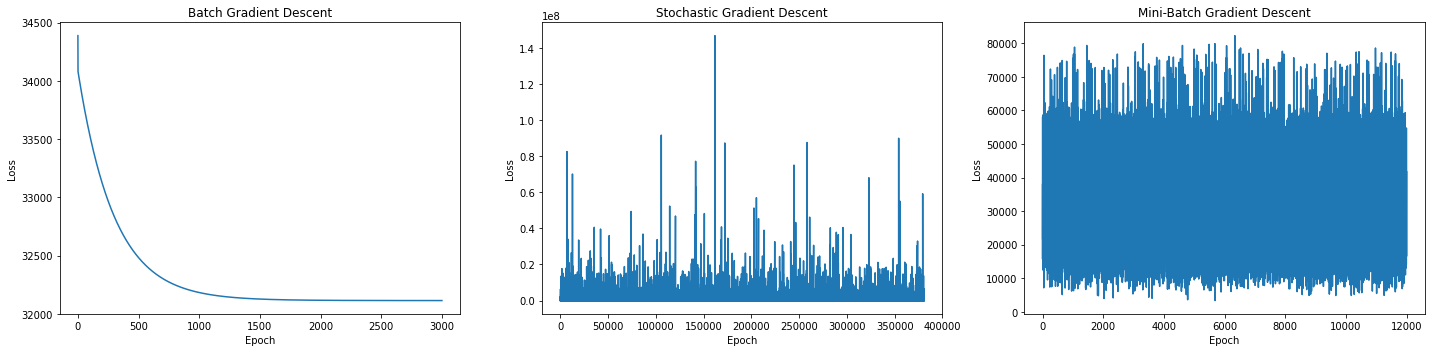

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
model1.history(ax[0])
ax[0].set_title('Batch Gradient Descent')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
model2.history(ax[1])
ax[1].set_title('Stochastic Gradient Descent')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
model3.history(ax[2])
ax[2].set_title('Mini-Batch Gradient Descent')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss')
plt.tight_layout()
plt.show()

# **Bài 2**

In [11]:
# Select features for modeling
features = ['Height', 'Width']
label = ['Weight']
X, y = pre_proc(data,features,label)

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X2_train.shape)
print(y2_train.shape)

(127, 3)
(127, 1)


In [12]:
# Linear Regression model with Batch Gradient Descent
w_init = np.random.randn(3, 1) # initialize w
model4 =  LinearRegressionModel(X=X2_train, Y=y2_train, w_init=w_init, learning_rate=0.01,epochs=3000)
w_opt4 = model4.BatchGD()

Streaming output truncated to the last 5000 lines.
 [   1.38605087]
 [ 165.8819333 ]]
>> Epoch: 1334/3000, Loss: 14760.317766446453 =================== w: [[-348.67650683]
 [   1.38600901]
 [ 165.9053836 ]]
>> Epoch: 1335/3000, Loss: 14758.900560564733 =================== w: [[-348.7932609 ]
 [   1.38596721]
 [ 165.92880706]]
>> Epoch: 1336/3000, Loss: 14757.486597095027 =================== w: [[-348.90988134]
 [   1.38592545]
 [ 165.95220372]]
>> Epoch: 1337/3000, Loss: 14756.075868619055 =================== w: [[-349.0263683 ]
 [   1.38588374]
 [ 165.97557359]]
>> Epoch: 1338/3000, Loss: 14754.668367735509 =================== w: [[-349.14272192]
 [   1.38584207]
 [ 165.99891671]]
>> Epoch: 1339/3000, Loss: 14753.264087060003 =================== w: [[-349.25894236]
 [   1.38580046]
 [ 166.02223311]]
>> Epoch: 1340/3000, Loss: 14751.86301922506 =================== w: [[-349.37502978]
 [   1.38575889]
 [ 166.04552282]]
>> Epoch: 1341/3000, Loss: 14750.465156880053 =================== w:

In [13]:
# Linear Regression model with Stochastic Gradient Descent
model5 =  LinearRegressionModel(X=X2_train, Y=y2_train, w_init=w_init, learning_rate=0.01,epochs=3000)
w_opt5 = model5.SGD()

Streaming output truncated to the last 5000 lines.
w at iter 116:  [[-451.26865153]
 [ -11.71184814]
 [ 165.00305041]] , Loss: 0.5790953611718457
w at iter 117:  [[-441.33190817]
 [  95.72422113]
 [ 239.32989078]] , Loss: 269250.265167937
w at iter 118:  [[-449.33367304]
 [  50.0517476 ]
 [ 206.05855245]] , Loss: 77280.7693740261
w at iter 119:  [[-453.72681885]
 [  25.27440524]
 [ 190.57271348]] , Loss: 28941.6878519661
w at iter 120:  [[-454.39077231]
 [  22.73544721]
 [ 188.95797866]] , Loss: 1356.9644096859288
w at iter 121:  [[-456.60896258]
 [   8.02019474]
 [ 181.0882832 ]] , Loss: 4423.756404814569
w at iter 122:  [[-4.57306780e+02]
 [ 2.48885693e-01]
 [ 1.76899288e+02]] , Loss: 907.7470625653526
w at iter 123:  [[-458.71458306]
 [  -7.5257089 ]
 [ 171.27511281]] , Loss: 2735.6891147524907
w at iter 124:  [[-458.09207904]
 [  -4.32753222]
 [ 173.16553303]] , Loss: 778.3926176008135
w at iter 125:  [[-458.29341417]
 [  -7.12868788]
 [ 172.14420014]] , Loss: 293.32932421549725
w 

In [14]:
# Linear Regression model with Mini-Batch Gradient Descent
model6 =  LinearRegressionModel(X=X2_train, Y=y2_train, w_init=w_init, learning_rate=0.01,batch_size=32, max_iters=4, epochs=3000)
w_opt6 = model6.MiniBatchGD()

Streaming output truncated to the last 5000 lines.
 [ 188.34029297]]
w at iter 2:  [[-451.7323109 ]
 [   1.39728044]
 [ 187.13540528]]
w at iter 3:  [[-451.76675552]
 [   1.44293266]
 [ 186.9303711 ]]
>> Epoch: 2615/3000 =========================== Loss: 7628.715263403609
w at iter 0:  [[-451.73724576]
 [   1.51795587]
 [ 187.00574843]]
w at iter 1:  [[-451.51552853]
 [   3.70211491]
 [ 188.38192672]]
w at iter 2:  [[-4.51956317e+02]
 [ 1.53679742e-01]
 [ 1.86755595e+02]]
w at iter 3:  [[-452.00911351]
 [  -0.9481873 ]
 [ 185.69907424]]
>> Epoch: 2616/3000 =========================== Loss: 7574.1820083860175
w at iter 0:  [[-451.90987425]
 [   0.67441812]
 [ 186.41494   ]]
w at iter 1:  [[-451.85160438]
 [   1.53147421]
 [ 187.15163735]]
w at iter 2:  [[-451.75335895]
 [   3.56629375]
 [ 188.29853592]]
w at iter 3:  [[-451.9683024]
 [  -0.605511 ]
 [ 185.9257964]]
>> Epoch: 2617/3000 =========================== Loss: 8011.846940394465
w at iter 0:  [[-451.14350451]
 [   8.68697425]
 [ 

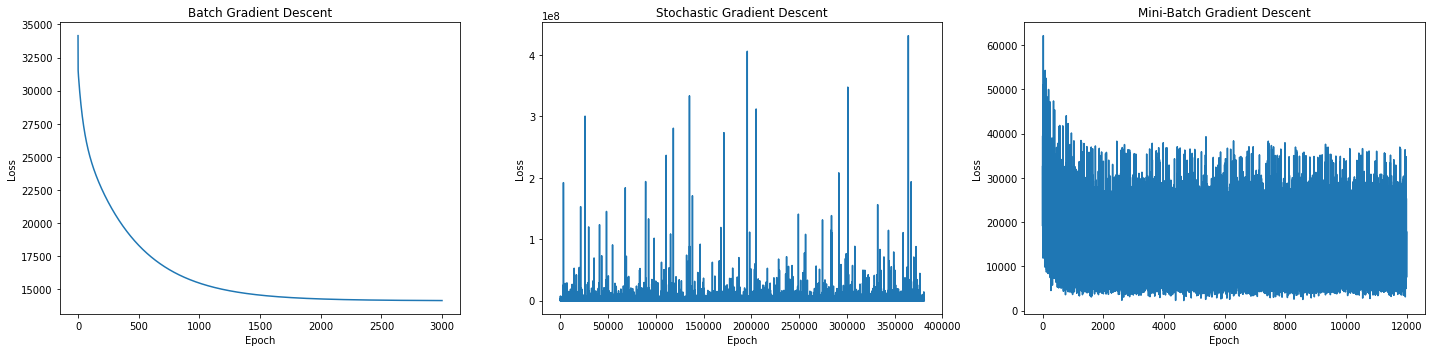

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
model4.history(ax[0])
ax[0].set_title('Batch Gradient Descent')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
model5.history(ax[1])
ax[1].set_title('Stochastic Gradient Descent')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
model6.history(ax[2])
ax[2].set_title('Mini-Batch Gradient Descent')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss')
plt.tight_layout()
plt.show()

# **Bài 3**

In [16]:
# Best weights cho cau 1
pred1_train = model1.predict(X1_train)
pred1_test = model1.predict(X1_test)
print('\nmodel1 best weight: ', model1.best_weights()[0])
print('train loss: ',mean_squared_error(y1_train, pred1_train))
print('test loss: ',mean_squared_error(y1_test, pred1_test))

pred2_train = model2.predict(X1_train)
pred2_test = model2.predict(X1_test)
print('\nmodel2 best weight: ', model2.best_weights()[0])
print('train loss: ',mean_squared_error(y1_train, pred2_train))
print('test loss: ',mean_squared_error(y1_test, pred2_test))

pred3_train = model3.predict(X1_train)
pred3_test = model3.predict(X1_test)
print('\nmodel3 best weight: ', model3.best_weights()[0])
print('train loss: ',mean_squared_error(y1_train, pred3_train))
print('test loss: ',mean_squared_error(y1_test, pred3_test))




model1 best weight:  [[-149.03877625]
 [  60.73391347]]
train loss:  64227.362656766716
test loss:  45887.49566732267

model2 best weight:  [[-100.43427405]
 [  33.74687907]]
train loss:  111734.40690195165
test loss:  113126.94402803201

model3 best weight:  [[-149.78848151]
 [  64.96149046]]
train loss:  65847.18163902403
test loss:  47197.69439098766


In [17]:
# Best weights cho cau 2
pred4_train = model4.predict(X2_train)
pred4_test = model4.predict(X2_test)
print('\nmodel4 best weight: ', model4.best_weights()[0])
print('train loss: ',mean_squared_error(y2_train, pred4_train))
print('test loss: ',mean_squared_error(y2_test, pred4_test))

pred5_train = model5.predict(X2_train)
pred5_test = model5.predict(X2_test)
print('\nmodel5 best weight: ', model5.best_weights()[0])
print('train loss: ',mean_squared_error(y2_train, pred5_train))
print('test loss: ',mean_squared_error(y2_test, pred5_test))

pred6_train = model6.predict(X2_train)
pred6_test = model6.predict(X2_test)
print('\nmodel6 best weight: ', model6.best_weights()[0])
print('train loss: ',mean_squared_error(y2_train, pred6_train))
print('test loss: ',mean_squared_error(y2_test, pred6_test))



model4 best weight:  [[-435.52827665]
 [   1.35492741]
 [ 183.3297415 ]]
train loss:  28309.097409431193
test loss:  23505.758230257947

model5 best weight:  [[-421.62913955]
 [  49.93166865]
 [ 238.69040103]]
train loss:  574235.5948521723
test loss:  558341.6159363603

model6 best weight:  [[-451.56157786]
 [  -2.10618266]
 [ 185.33487435]]
train loss:  29803.5606634249
test loss:  31198.25064038045
